<a href="https://colab.research.google.com/github/2206081MuhamadHamzah/UTS-PengolahanCItra2024/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Histogram Citra:**

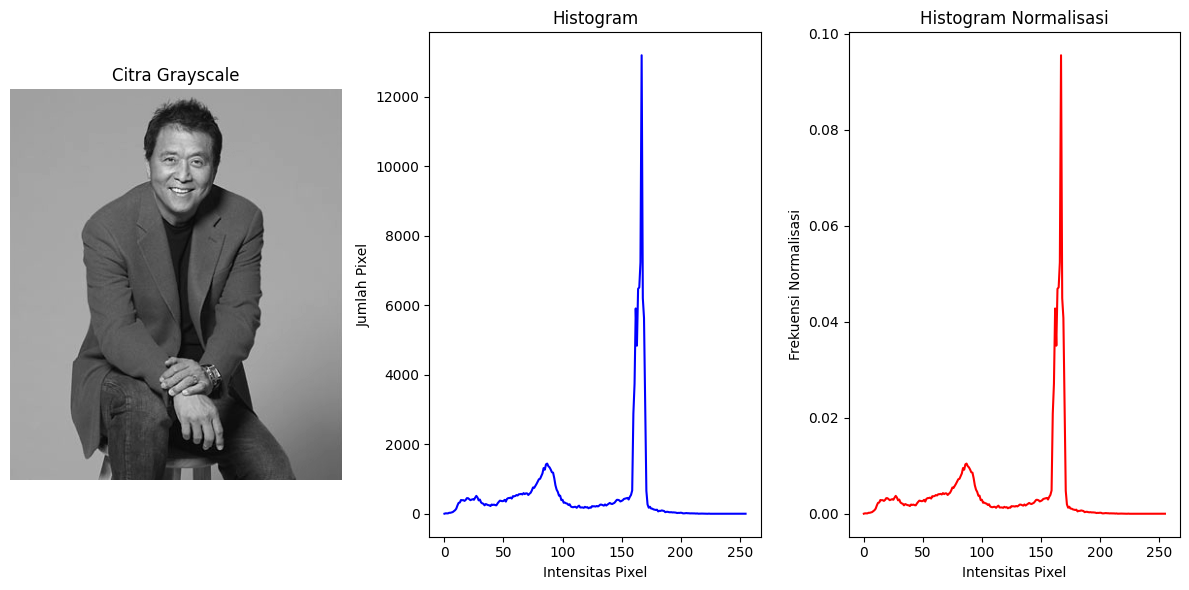

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra grayscale
image = cv2.imread('Kiyosaki-9.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Citra tidak ditemukan. Pastikan file citra tersedia!")
    exit()

# Menghitung histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Normalisasi histogram
normalized_hist = hist / hist.sum()

# Menampilkan citra grayscale
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

# Menampilkan histogram
plt.subplot(1, 3, 2)
plt.plot(hist, color='blue')
plt.title('Histogram')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Pixel')

# Menampilkan histogram normalisasi
plt.subplot(1, 3, 3)
plt.plot(normalized_hist, color='red')
plt.title('Histogram Normalisasi')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi Normalisasi')

plt.tight_layout()
plt.show()


### **Penjelasan Langkah-Langkah**
**Membaca Citra Grayscale:**

1. Menggunakan cv2.imread() dengan parameter cv2.IMREAD_GRAYSCALE, citra dibaca sebagai gambar grayscale dengan intensitas pixel 0–255.
Jika gambar tidak ditemukan, program akan memberikan peringatan.
Menghitung Histogram:

2. Fungsi cv2.calcHist() menghitung histogram citra.
Parameter pertama [image]: Input citra.
Parameter kedua [0]: Indeks channel (0 untuk grayscale).
Parameter ketiga None: Mask (tidak ada mask).
Parameter keempat [256]: Jumlah bin (256 untuk grayscale).
Parameter kelima [0, 256]: Rentang intensitas pixel.
Histogram adalah array berisi jumlah piksel untuk setiap nilai intensitas.
Normalisasi Histogram:

3. Histogram dinormalisasi dengan membagi setiap nilai dalam histogram dengan jumlah total piksel (hist.sum()).
Hasilnya adalah distribusi probabilitas nilai intensitas.
Visualisasi:

Citra Grayscale: Ditampilkan dengan Matplotlib menggunakan cmap='gray'.
Histogram: Plot jumlah piksel untuk tiap intensitas menggunakan warna biru.
Histogram Normalisasi: Plot histogram ternormalisasi menggunakan warna merah.


### **Operasi Konvolusi dengan Kernel Sederhana:**

Saving Kiyosaki-9.jpg to Kiyosaki-9 (3).jpg


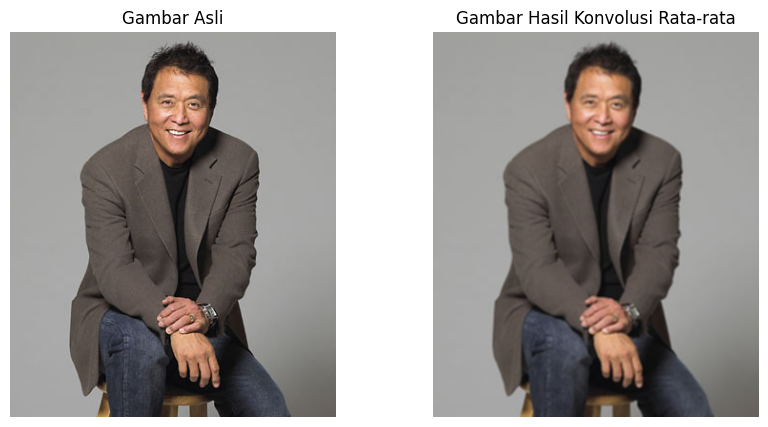

In [4]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Upload file gambar
uploaded = files.upload()

# Membaca gambar berwarna
image = cv2.imread(list(uploaded.keys())[0])

# Kernel rata-rata 3x3
average_kernel = np.ones((3, 3), np.float32) / 9

# Fungsi konvolusi dengan kernel rata-rata
def konvolusi_average(image, kernel):
    # Pisahkan gambar menjadi tiga channel warna: B, G, R
    channels = cv2.split(image)
    # Array untuk menyimpan hasil konvolusi pada setiap channel
    result_channels = []

    # Lakukan konvolusi pada setiap channel
    for channel in channels:
        result_channel = cv2.filter2D(channel, -1, kernel)
        result_channels.append(result_channel)

    # Gabungkan kembali channel untuk membuat gambar hasil konvolusi
    return cv2.merge(result_channels)

# Terapkan konvolusi rata-rata
image_result = konvolusi_average(image, average_kernel)

# Menampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Hasil Konvolusi Rata-rata")
plt.imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


Kernel Rata-Rata:

Kernel rata-rata 3x3 adalah matriks
3×3 yang setiap elemennya bernilai
1/9
Ini memberikan bobot yang sama untuk setiap piksel tetangga dalam jendela 3×3

average_kernel = np.ones((3, 3), np.float32) / 9
Fungsi Konvolusi:


**Fungsi Konvlusi**
1. Gambar dipisahkan menjadi tiga channel warna: B (biru), G (hijau), R (merah).
2. Setiap channel dikenakan operasi konvolusi dengan fungsi cv2.filter2D(), yang menghitung rata-rata piksel di sekitar jendela 3×3
3. Channel yang telah dikonvolusi digabung kembali menjadi gambar penuh.
**Hasil Akhir:**

1. Gambar asli dibandingkan dengan gambar hasil konvolusi menggunakan Matplotlib.

**Efek Kernel Rata-Rata**
1. Kernel rata-rata menghasilkan efek perataan atau penghalusan (smoothing) pada gambar.
2. Efek yang terlihat:

Pengurangan detail: Tepi objek menjadi kurang tajam karena intensitas piksel disamakan dengan tetangganya.
Pengurangan noise: Noise acak dalam gambar menjadi lebih halus atau tidak terlalu terlihat.

### **Transformasi Fourier:**

Saving Kiyosaki-9.jpg to Kiyosaki-9 (4).jpg
Citra berhasil dibaca!


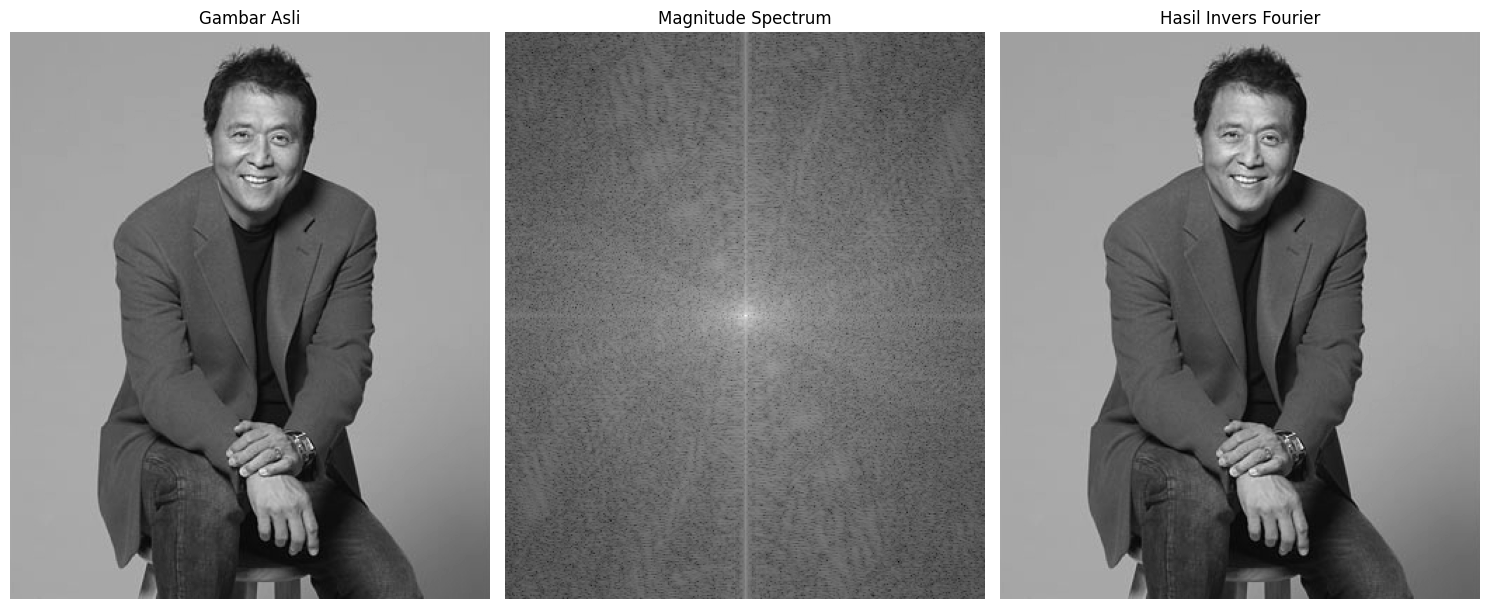

In [5]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload file gambar
uploaded = files.upload()

# Membaca citra grayscale
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Memastikan citra berhasil dibaca
if image is None:
    print("Citra tidak ditemukan. Pastikan file citra tersedia!")
else:
    print("Citra berhasil dibaca!")

# Transformasi Fourier
# Menggunakan fungsi dft untuk melakukan transformasi Fourier
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Memindahkan frekuensi nol ke tengah

# Menghitung Magnitude Spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Inverse Fourier Transform
dft_ishift = np.fft.ifftshift(dft_shift)  # Memindahkan kembali ke domain frekuensi asli
image_reconstructed = cv2.idft(dft_ishift)  # Inverse transform
image_reconstructed = cv2.magnitude(image_reconstructed[:, :, 0], image_reconstructed[:, :, 1])

# Visualisasi
plt.figure(figsize=(15, 10))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

# Gambar Hasil Invers Fourier
plt.subplot(1, 3, 3)
plt.title("Hasil Invers Fourier")
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **Langkah-Langkah Implementasi**

1. Import Library:

    cv2: Untuk membaca gambar dan melakukan operasi pada citra.
    numpy: Untuk perhitungan matriks, termasuk Transformasi Fourier.
    matplotlib.pyplot: Untuk visualisasi.

2. Mengunggah dan Membaca Gambar:

    Gambar diunggah menggunakan files.upload() dan dibaca dalam format grayscale (cv2.IMREAD_GRAYSCALE).
3. Transformasi Fourier:

    cv2.dft() digunakan untuk menghitung Transformasi Fourier Diskrit (DFT) pada citra.
    np.fft.fftshift() digunakan untuk memindahkan komponen frekuensi rendah (di pusat citra) ke tengah spektrum, sehingga lebih mudah dianalisis.
4. Magnitude Spectrum:

    Menggunakan fungsi cv2.magnitude() untuk menghitung besar frekuensi dari Transformasi Fourier.
    Skala logaritmik (20 * np.log) digunakan untuk meningkatkan keterbacaan spektrum, karena nilai frekuensi dapat sangat bervariasi.
5. Inverse Fourier Transform:

    np.fft.ifftshift() memindahkan kembali frekuensi ke domain asli.
    cv2.idft() menghitung invers transformasi untuk merekonstruksi kembali gambar ke domain spasial.
6. Visualisasi:

    Gambar asli, magnitude spectrum, dan hasil invers Fourier ditampilkan menggunakan plt.imshow().

### **Operasi Aritmatika Citra - Pencerahan**

Saving Kiyosaki-9.jpg to Kiyosaki-9 (6).jpg
Citra berhasil dibaca!


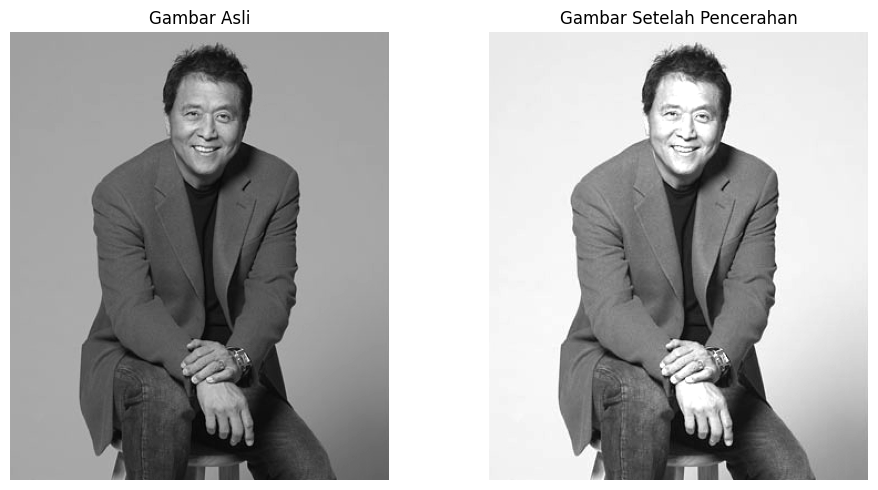

In [7]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload file gambar
uploaded = files.upload()

# Membaca citra grayscale
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Memastikan citra berhasil dibaca
if image is None:
    print("Citra tidak ditemukan. Pastikan file citra tersedia!")
else:
    print("Citra berhasil dibaca!")

# Menentukan konstanta pencerahan
brightness_constant = 80

# Operasi pencerahan dengan clipping
brightened_image = cv2.add(image, brightness_constant)

# Visualisasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah pencerahan
plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Pencerahan")
plt.imshow(brightened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **Langkah-Langkah Implementasi**
1. Import Library:

    cv2 untuk pengolahan citra.
    numpy untuk operasi matriks.
    matplotlib.pyplot untuk visualisasi.
2. Mengunggah dan Membaca Citra:

    Citra diunggah menggunakan files.upload() dan dibaca dalam format grayscale (cv2.IMREAD_GRAYSCALE).
3. Operasi Pencerahan:

    Tambahkan nilai konstan (misalnya, 80) ke semua piksel pada citra.
    Pastikan nilai piksel tidak keluar dari rentang [0, 255] menggunakan clipping dengan cv2.add() atau np.clip().
4. Visualisasi

    Menampilkan citra asli dan hasil pencerahan secara berdampingan.